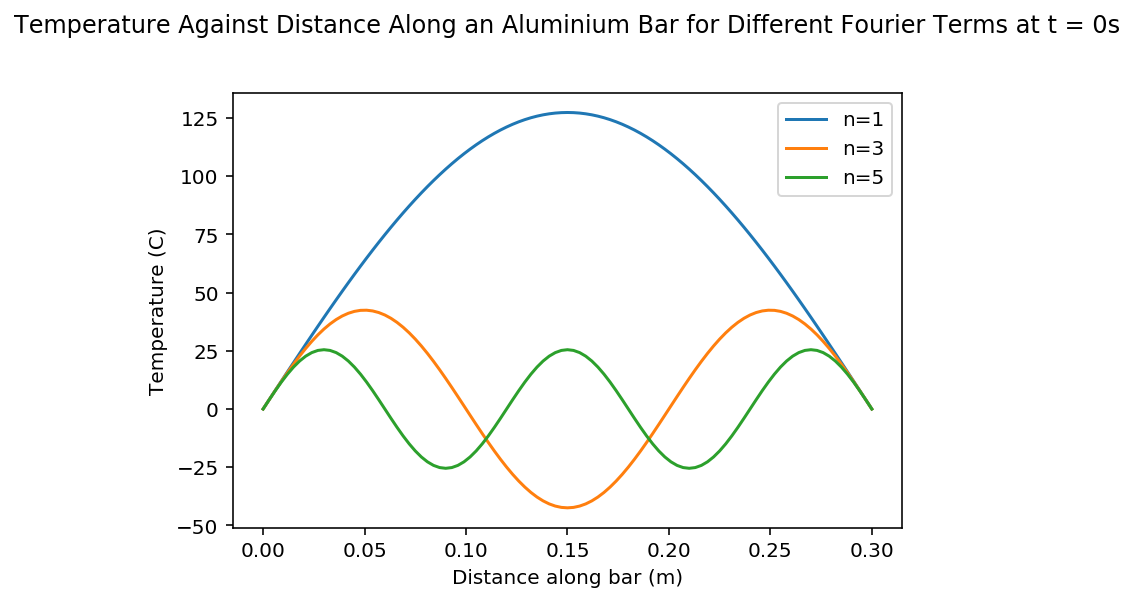

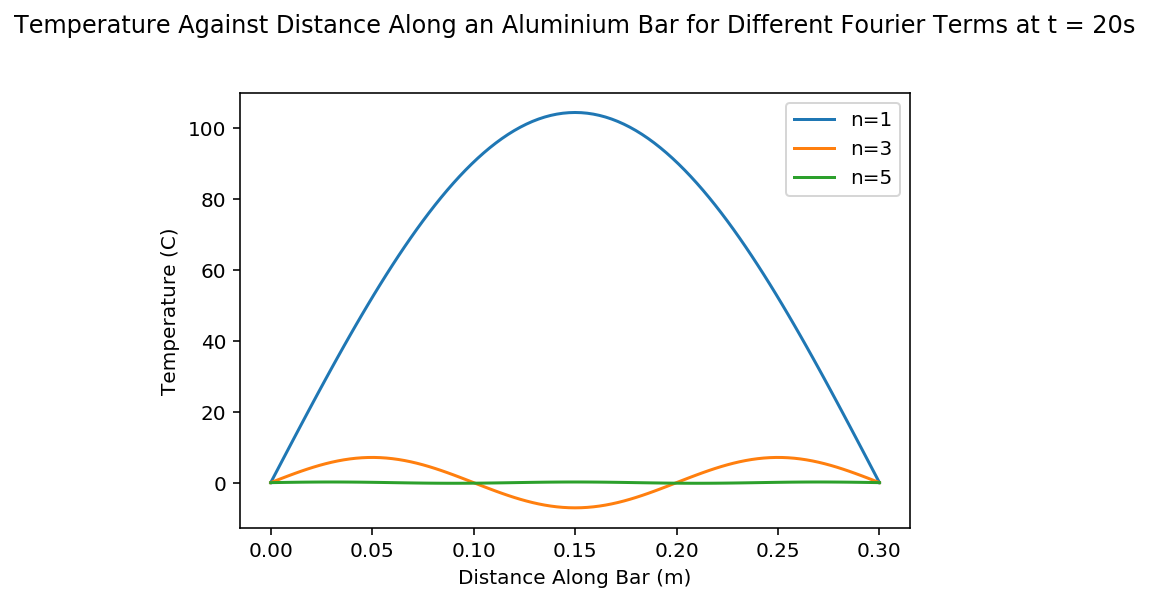

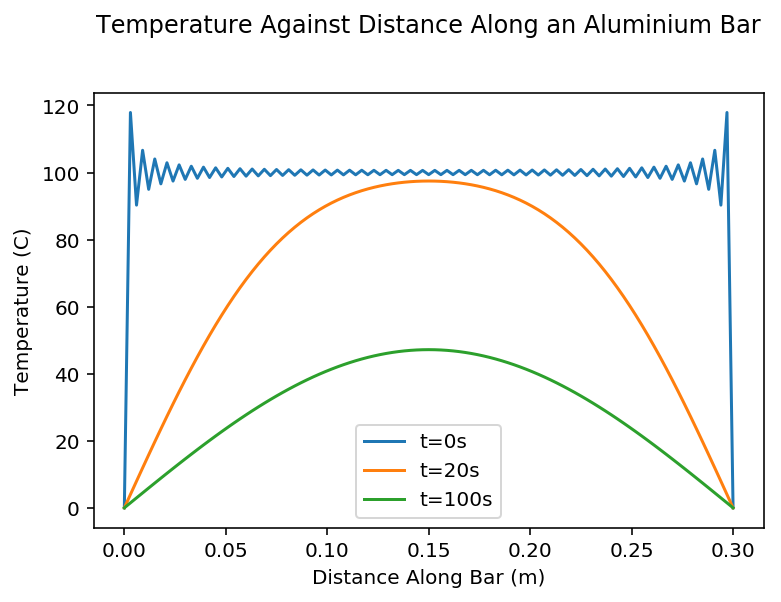

Text(0, 0.5, 'Time (s)')

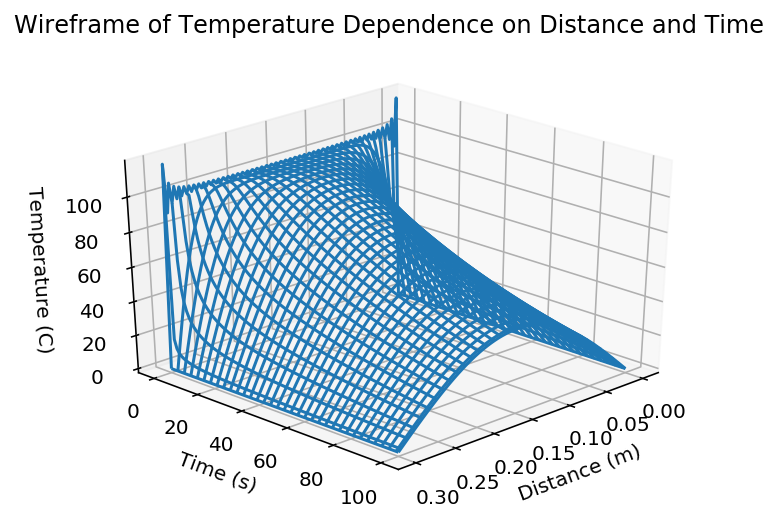

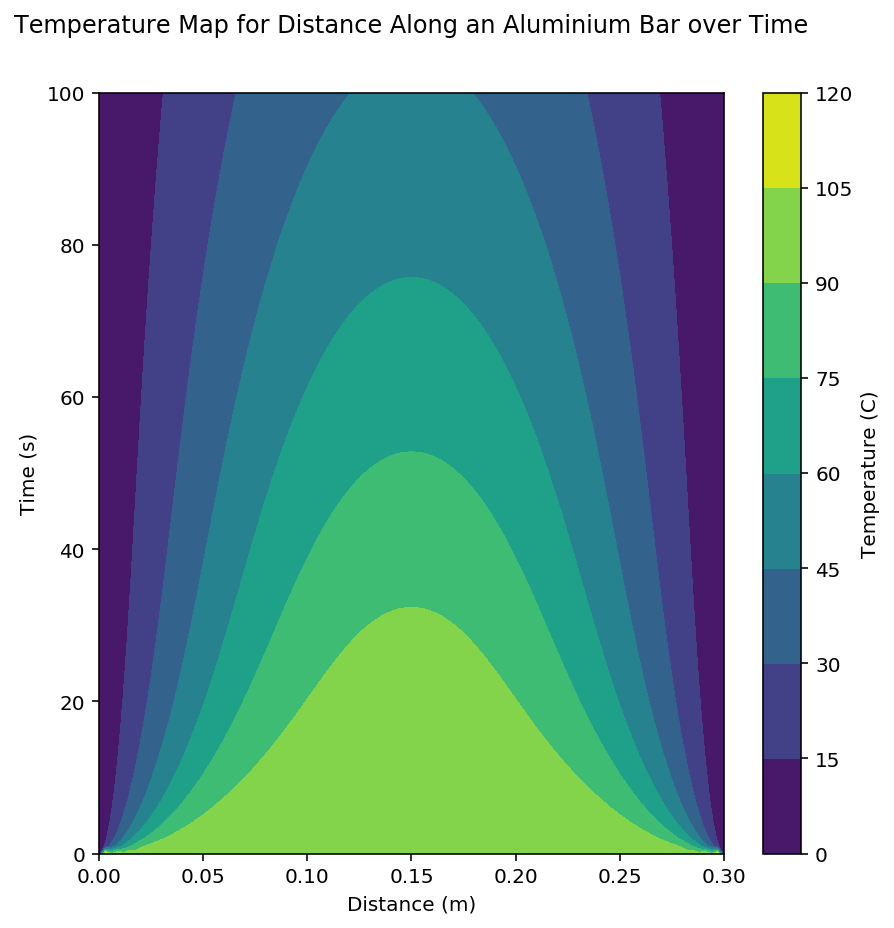

In [1]:
# import statements
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt


# Define constants
SpH=900  # J/(kg K)
Rho=2700 # kg/m3
kap=220  # W/(m K)

# Define parameters of the problem
BarL=0.3 # m
T0=100.  # C

#define array for x between 0 and L
xarray = np.linspace(0, 0.3, 101)


#define function in x(distance), t (time) and n
def TN(x,t,n):
    #define alpha as a function of n
    alpha=(n*np.pi)/BarL
    #write equation for Temperature
    return (((4*T0)/(n*np.pi))*(np.sin(alpha*x))*(np.exp((-(alpha**2)*(kap*t))/(SpH*Rho))))

#Plot 3 graphs at t=0s for n = 1,2,3


#Set time value
t1 = 0
#Functions for n = 1, 3, 5
TN1 = TN (xarray, t1, 1)
TN2 = TN (xarray, t1, 3)
TN3 = TN (xarray, t1, 5)

#Plot each line for each n value
plt.plot(xarray, TN1, label = 'n=1')
plt.plot(xarray, TN2, label = 'n=3')
plt.plot(xarray, TN3, label = 'n=5')
plt.xlabel ('Distance along bar (m)')
plt.ylabel('Temperature (C)')
plt.title('Temperature Against Distance Along an Aluminium Bar for Different Fourier Terms at t = 0s', pad=30)
plt.legend()
plt.show()


#Plot 3 graphs at t=20s for n = 1,2,3



#Set new time value
t2 = 20
#Functions for n = 1, 3, 5
TN4 = TN (xarray, t2, 1)
TN5 = TN (xarray, t2, 3)
TN6 = TN (xarray, t2, 5)

#Plot each line for new time value
plt.figure()
plt.plot(xarray, TN4, label = 'n=1')
plt.plot(xarray, TN5, label = 'n=3')
plt.plot(xarray, TN6, label = 'n=5')
plt.xlabel ('Distance Along Bar (m)')
plt.ylabel('Temperature (C)')
plt.legend()
plt.title('Temperature Against Distance Along an Aluminium Bar for Different Fourier Terms at t = 20s', pad=30)
plt.show()


#Larger values of n have less of an effect on the maximum temperature
#As t increases the negative exponential term dominates 



#Sum T over first 50 terms and plot for t = 0,20,100


#Create an array for n values between 1 and 99
narray = np.arange(1,100,2)

#Sum T over all n values for t = 0,20,100
TNsum1 = sum((TN(xarray, 0, i)) for i in narray)
TNsum2 = sum((TN(xarray, 20, i)) for i in narray)
TNsum3 = sum((TN(xarray, 100, i)) for i in narray)

#Plot
plt.plot(xarray, TNsum1, label = 't=0s')
plt.plot(xarray, TNsum2, label = 't=20s')
plt.plot(xarray, TNsum3, label = 't=100s')
plt.xlabel ('Distance Along Bar (m)')
plt.ylabel ('Temperature (C)')
plt.title('Temperature Against Distance Along an Aluminium Bar', pad=30)
plt.legend()
plt.show()

#Ripple exists at t=0 as only first 50 terms have been summed over
#If summed to infinity we should see a straight line at T = 100C
#Shape due to sin term



#Plot a 3D wireframe and temperature map for sum of T over first 50 terms

#Create an array for time values between 0 and 100
tvalues = np.arange(0,101,1)


#Define array for use in 3D plot
X, Y = np.meshgrid(xarray, tvalues)
TNsumt = sum ((TN(X, Y, i)) for i in narray)

#Plot 3D Wireframe of x, t and T
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, TNsumt)
ax.set_xlabel('Distance (m)')
ax.set_ylabel('Time (s)')
ax.set_zlabel('Temperature (C)')
ax.set_title('Wireframe of Temperature Dependence on Distance and Time', pad=30)
#Rotate plot
ax.view_init(azim=45)

#Plot Temperature Map
plt.figure(figsize=(7,7))
plt.title('Temperature Map for Distance Along an Aluminium Bar over Time', pad=30)
plt.contourf(X, Y, TNsumt)
plt.colorbar(label='Temperature (C)')
plt.xlabel('Distance (m)')
plt.ylabel('Time (s)')
